PROBLEM STATEMENT:

FOR A FOOD DELIVERING COMPANY WE ARE TRYING TO FIND THE BEST LOCATION IN THE MOST POPULATED CITY SUBURBS IN INDIA FOR THAT WE HAVE TAKEN INTO CONSIDERATION BANGALORE,MUMBAI,HYDERABAD AND MUMBAI AS OUR PRIMARY OPTIONS AND BASED ON DENSITY OF NEIGHBOURS AND DIVERSITY IN CUISINE WE WILL PICK ONE OF THE CITY SUBURBS FOR OUR BUSINESS.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from bs4 import BeautifulSoup #for getting html data from links
from sklearn.cluster import KMeans # import k-means from clustering stage
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium # map rendering library
import seaborn as sns #for 

print('Libraries imported.')

Libraries imported.


FOURSQUARE CREDENTIALS FOR LOCATION DATA

In [2]:
CLIENT_ID = 'V4TZK3PYWWAWOTB2HV1V31CLVWWQIKBYQ0PCDOV0AGJLHR5S' # Foursquare ID
CLIENT_SECRET = 'V3JNSX4TJKJP4LTGHXQEX5NJ2CCEVGNQVCSTEZGMMWZBJBOP' # Foursquare Secret
VERSION = '20200418' # Foursquare API version

print('credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

credentails:
CLIENT_ID: V4TZK3PYWWAWOTB2HV1V31CLVWWQIKBYQ0PCDOV0AGJLHR5S
CLIENT_SECRET:V3JNSX4TJKJP4LTGHXQEX5NJ2CCEVGNQVCSTEZGMMWZBJBOP


In [3]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                num_ven,
                food_id)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

BANGALORE

In [4]:
BLR_data = requests.get("https://commons.wikimedia.org/wiki/Category:Suburbs_of_Bangalore").text
soup = BeautifulSoup(BLR_data, 'html.parser')

In [5]:

neighborhoodlist = []
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)



In [6]:
BLR_neig = pd.DataFrame({'Neighborhood': neighborhoodlist})
BLR_neig.head()

,Neighborhood
0,"Agara, Bangalore"
1,Arekere
2,Banashankari
3,Banaswadi
4,Basavanagudi


In [7]:
BLR_neig.tail()

,Neighborhood
54,Varthur
55,"Whitefield, Bangalore"
56,Yelahanka
57,Yeshwantpur
58,Yeswanthpur


In [8]:
#for i, neig in zip(range(0,len(BLR_neig['Neighborhood'])), BLR_neig['Neighborhood']):
       # BLR_neig['Neighborhood'][i] = neig.split(' ', 1)[0]
#BLR_neig.head(20)

In [9]:
BLR_neig.tail()

,Neighborhood
54,Varthur
55,"Whitefield, Bangalore"
56,Yelahanka
57,Yeshwantpur
58,Yeswanthpur


In [10]:
#BLR_neig.drop([0], axis = 0, inplace = True)
#BLR_neig.head()

In [11]:
print('There are {} neighborhoods in BANGALORE.'.format(BLR_neig.shape[0]))

There are 59 neighborhoods in BANGALORE.


In [12]:
#create new empty columns for latitude and longitude
BLR_neig["Latitude"] = ""
BLR_neig["Longitude"] = ""
BLR_neig["Location"] = ""

In [13]:
def get_location(localities):
    g = geocoder.arcgis('{}, Bangalore, India'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [16]:
for i, neig in zip(range(0,len(BLR_neig['Neighborhood'])), BLR_neig['Neighborhood']):
    address = '{}, BANGALORE, INDIA'.format(BLR_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="blr_explorer")
        location = geolocator.geocode(address)
        BLR_neig.loc[i,"Location"] = str(location)
        BLR_neig.loc[i,"Latitude"] = location.latitude
        BLR_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
BLR_neig.head(10)


,Neighborhood,Latitude,Longitude,Location
0,"Agara, Bangalore",12.6201,77.4793,"Agara, Kanakapura taluk, Ramanagara district, ..."
1,Arekere,12.8872,77.596,"Arekere, Bommanahalli Zone, Bengaluru, Bangalo..."
2,Banashankari,12.9152,77.5736,"Banashankari, Kanakapura Road, Banashankari Te..."
3,Banaswadi,13.0142,77.6519,"Banaswadi, East Zone, Bengaluru, Bangalore Eas..."
4,Basavanagudi,12.9417,77.5755,"Basavanagudi, South Zone, Bengaluru, Bangalore..."
5,"Begur, Bangalore",12.8634,77.613,"Begur, Bommanahalli Zone, Bengaluru, Bangalore..."
6,Bellandur,12.9791,77.5913,"Bengaluru, Bangalore North, Bangalore Urban, K..."
7,BEML,12.9716,77.6736,"BEML, B R Ambedkar Road, Vijnana Nagar, Mahade..."
8,Bengaluru Pete,,,None
9,Bidadi,12.7989,77.387,"Bidadi, Ramanagara taluk, Ramanagara district,..."


In [17]:
#ensure that each row includes BANGALORE within its location
BLR_neig = BLR_neig[BLR_neig["Location"].str.contains('Bangalore')]
BLR_neig.reset_index(drop=True, inplace = True)
BLR_neig.drop('Location', axis  = 1, inplace = True)
BLR_neig.head()

,Neighborhood,Latitude,Longitude
0,Arekere,12.8872,77.596
1,Banashankari,12.9152,77.5736
2,Banaswadi,13.0142,77.6519
3,Basavanagudi,12.9417,77.5755
4,"Begur, Bangalore",12.8634,77.613


In [18]:
print('After preprocessing BANGALORE, there are {} neighborhoods in BANGALORE.'.format(BLR_neig.shape[0]))

After preprocessing BANGALORE, there are 51 neighborhoods in BANGALORE.


In [20]:

num_ven = 100 #no. of venues I would like to get
radius = 1000 #search radius
food_id = '4d4b7105d754a06374d81259' #venue category id for food

BLR_venues = getNearbyVenues(names=BLR_neig['Neighborhood'], latitudes=BLR_neig['Latitude'], longitudes=BLR_neig['Longitude'])

In [21]:
BLR_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arekere,12.887209,77.596049,Chavadi,12.892199,77.602538,BBQ Joint
1,Arekere,12.887209,77.596049,Guru Garden,12.891196,77.597979,Indian Restaurant
2,Arekere,12.887209,77.596049,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
3,Arekere,12.887209,77.596049,Kababis,12.889605,77.597557,Indian Restaurant
4,Arekere,12.887209,77.596049,Pizza Hut,12.889420,77.597494,Pizza Place


In [22]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
#BLR_venues.to_csv(r'C:\Users\NEELESH\Desktop\COURSERA_CAPSTONE\BANGALORE_VENUES.csv', index = False, header=True)

In [23]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(BLR_venues['Venue Category'].unique())))
BLR_venues.groupby('Neighborhood').count().head()

There are 75 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arekere,33,33,33,33,33,33
BEML,13,13,13,13,13,13
Banashankari,22,22,22,22,22,22
Banaswadi,25,25,25,25,25,25
Basavanagudi,50,50,50,50,50,50


MUMBAI

In [24]:
MUM_data = requests.get("https://commons.wikimedia.org/wiki/Category:Suburbs_of_Mumbai").text
soup = BeautifulSoup(MUM_data, 'html.parser')

In [25]:
neighborhoodlist = []
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)

In [26]:
MUM_neig = pd.DataFrame({'Neighborhood': neighborhoodlist})
MUM_neig.head()

,Neighborhood
0,Aarey Milk Colony
1,Andheri
2,Anushakti Nagar
3,Bandra
4,Borivali


In [27]:
MUM_neig.tail()

,Neighborhood
26,"Sion, Mumbai"
27,Thane
28,Ulhasnagar
29,Vasai-Virar
30,Vile Parle


In [28]:
print('There are {} neighborhoods in MUMBAI.'.format(MUM_neig.shape[0]))

There are 31 neighborhoods in MUMBAI.


In [29]:
#create new empty columns for latitude and longitude
MUM_neig["Latitude"] = ""
MUM_neig["Longitude"] = ""
MUM_neig["Location"] = ""

In [30]:
def get_location(localities):
    g = geocoder.arcgis('{}, MUMBAI, India'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [31]:
for i, neig in zip(range(0,len(MUM_neig['Neighborhood'])), MUM_neig['Neighborhood']):
    address = '{}, MUMBAI, INDIA'.format(MUM_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="mum_explorer")
        location = geolocator.geocode(address)
        MUM_neig.loc[i,"Location"] = str(location)
        MUM_neig.loc[i,"Latitude"] = location.latitude
        MUM_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
MUM_neig.head(10)


,Neighborhood,Latitude,Longitude,Location
0,Aarey Milk Colony,19.1561,72.8707,"Aarey Milk Colony, Zone 4, Mumbai, Mumbai Subu..."
1,Andheri,19.1197,72.8464,"Andheri, Madhavdas Amarshi Marg, K/W Ward, Zon..."
2,Anushakti Nagar,19.0396,72.9222,"Anushakti Nagar, Zone 5, Mumbai, Mumbai Suburb..."
3,Bandra,19.055,72.8402,"Bandra, Gurunanak Marg (Turner Road), Bandra W..."
4,Borivali,19.2291,72.8574,"Borivali, Kasturba Gandhi Road, R/C Ward, Zone..."
5,Charni Road,18.9525,72.8174,"Charni Road, Maharshi Karve Road, C Ward, Zone..."
6,Chembur,19.0612,72.8976,"Chembur, Ramakrishna Chemburkar Marg, Chembur ..."
7,Ghatkopar,19.086,72.9082,"Ghatkopar, Station Road, Saibaba Nagar, N Ward..."
8,Goregaon,19.1648,72.85,"Goregaon, Station Road, Motilal Nagar 1, P/S W..."
9,Govandi,19.0554,72.9151,"Govandi, Deonar Road, Tata Nagar, M/E Ward, Zo..."


In [32]:
#ensure that each row includes MUMBAI within its location
MUM_neig = MUM_neig[MUM_neig["Location"].str.contains('Mumbai')]
MUM_neig.reset_index(drop=True, inplace = True)
MUM_neig.drop('Location', axis  = 1, inplace = True)
MUM_neig.head()


,Neighborhood,Latitude,Longitude
0,Aarey Milk Colony,19.1561,72.8707
1,Andheri,19.1197,72.8464
2,Anushakti Nagar,19.0396,72.9222
3,Bandra,19.055,72.8402
4,Borivali,19.2291,72.8574


In [33]:
print('After preprocessing MUMBAI, there are {} neighborhoods in MUMBAI.'.format(MUM_neig.shape[0]))

After preprocessing MUMBAI, there are 27 neighborhoods in MUMBAI.


In [34]:
MUM_venues = getNearbyVenues(names=MUM_neig['Neighborhood'], latitudes=MUM_neig['Latitude'], longitudes=MUM_neig['Longitude'])

In [35]:
MUM_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,19.156129,72.870722,Aarey Garden Restaurant,19.155514,72.878236,Indian Restaurant
1,Aarey Milk Colony,19.156129,72.870722,Panchvati Fast Food Corner,19.157628,72.874506,Fast Food Restaurant
2,Aarey Milk Colony,19.156129,72.870722,Shree Ganesh Restaurant,19.157598,72.874527,Chinese Restaurant
3,Aarey Milk Colony,19.156129,72.870722,Panchavati Fast Food Corner,19.157709,72.876511,Café
4,Aarey Milk Colony,19.156129,72.870722,Subway,19.158622,72.876653,Sandwich Place


In [36]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
#MUM_venues.to_csv(r'C:\Users\NEELESH\Desktop\COURSERA_CAPSTONE\MUMBAI_VENUES.csv', index = False, header=True)

In [37]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(MUM_venues['Venue Category'].unique())))
MUM_venues.groupby('Neighborhood').count().head()

There are 61 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aarey Milk Colony,8,8,8,8,8,8
Andheri,34,34,34,34,34,34
Anushakti Nagar,4,4,4,4,4,4
Bandra,54,54,54,54,54,54
Borivali,46,46,46,46,46,46


HYDERABAD

In [38]:
HYD_data = requests.get("https://commons.wikimedia.org/wiki/Category:Suburbs_of_Hyderabad,_India").text
soup = BeautifulSoup(HYD_data, 'html.parser')

In [39]:
neighborhoodlist = []
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)

In [40]:
HYD_neig = pd.DataFrame({'Neighborhood': neighborhoodlist})
HYD_neig.head()

,Neighborhood
0,Abids
1,Alwal
2,"Ameerpet, Hyderabad"
3,"Bandlaguda, Rangareddy"
4,Banjara Hills


In [41]:
HYD_neig.tail()

,Neighborhood
49,Shamshabad
50,Sitaphalmandi
51,Somajiguda
52,Tarnaka
53,Trimulgherry


In [42]:
print('There are {} neighborhoods in HYDERABAD.'.format(HYD_neig.shape[0]))

There are 54 neighborhoods in HYDERABAD.


In [43]:
#create new empty columns for latitude and longitude
HYD_neig["Latitude"] = ""
HYD_neig["Longitude"] = ""
HYD_neig["Location"] = ""

In [44]:
def get_location(localities):
    g = geocoder.arcgis('{}, HDERABAD, India'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [45]:
for i, neig in zip(range(0,len(HYD_neig['Neighborhood'])), HYD_neig['Neighborhood']):
    address = '{}, HYDERABAD, INDIA'.format(HYD_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="hyd_explorer")
        location = geolocator.geocode(address)
        HYD_neig.loc[i,"Location"] = str(location)
        HYD_neig.loc[i,"Latitude"] = location.latitude
        HYD_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
HYD_neig.head(10)

,Neighborhood,Latitude,Longitude,Location
0,Abids,17.3895,78.4772,"Abids, Greater Hyderabad Municipal Corporation..."
1,Alwal,17.5022,78.5089,"Alwal, Greater Hyderabad Municipal Corporation..."
2,"Ameerpet, Hyderabad",17.4375,78.4483,"Ameerpet, Greater Hyderabad Municipal Corporat..."
3,"Bandlaguda, Rangareddy",17.3645,78.5896,"Nagole-Bandlaguda Main Road, Bandlaguda, Ward ..."
4,Banjara Hills,17.4177,78.4399,"Banjara Hills, Greater Hyderabad Municipal Cor..."
5,Basheerbagh,17.405,78.4769,"Basheerbagh, Bade Ustad Ghulam Ali Khan Marg, ..."
6,Begumpet,17.444,78.4625,"Begumpet, Greater Hyderabad Municipal Corporat..."
7,Boduppal,17.4029,78.5829,"Ankura Hospital, Boduppal, NH163, Ward 10 Uppa..."
8,Bolarum,17.5334,78.5156,"Bolarum, Bolarum to Kompally Road, Brindavan C..."
9,"Cavalry Barracks, Hyderabad",,,None


In [46]:
#ensure that each row includes HYDERABAD within its location
HYD_neig = HYD_neig[HYD_neig["Location"].str.contains('Hyderabad')]
HYD_neig.reset_index(drop=True, inplace = True)
HYD_neig.drop('Location', axis  = 1, inplace = True)
HYD_neig.head(10)


,Neighborhood,Latitude,Longitude
0,Abids,17.3895,78.4772
1,Alwal,17.5022,78.5089
2,"Ameerpet, Hyderabad",17.4375,78.4483
3,"Bandlaguda, Rangareddy",17.3645,78.5896
4,Banjara Hills,17.4177,78.4399
5,Basheerbagh,17.405,78.4769
6,Begumpet,17.444,78.4625
7,Boduppal,17.4029,78.5829
8,Bolarum,17.5334,78.5156
9,Chikkadpally,17.4009,78.4976


In [47]:
print('After preprocessing Hyderabad, there are {} neighborhoods in Hyderabad.'.format(HYD_neig.shape[0]))

After preprocessing Hyderabad, there are 44 neighborhoods in Hyderabad.


In [48]:
HYD_venues = getNearbyVenues(names=HYD_neig['Neighborhood'], latitudes=HYD_neig['Latitude'], longitudes=HYD_neig['Longitude'])

In [49]:
HYD_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abids,17.389478,78.477182,Pragati,17.388088,78.481134,South Indian Restaurant
1,Abids,17.389478,78.477182,Santosh Dhaba,17.388485,78.479509,Indian Restaurant
2,Abids,17.389478,78.477182,Grand Hotel,17.387760,78.477577,Indian Restaurant
3,Abids,17.389478,78.477182,Karachi Bakery,17.383454,78.475075,Bakery
4,Abids,17.389478,78.477182,Santosh Dabha,17.391209,78.477575,Diner


In [50]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
#HYD_venues.to_csv(r'C:\Users\NEELESH\Desktop\COURSERA_CAPSTONE\HYDERABAD_VENUES.csv', index = False, header=True)

In [51]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(HYD_venues['Venue Category'].unique())))
HYD_venues.groupby('Neighborhood').count().head()

There are 57 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abids,19,19,19,19,19,19
Alwal,8,8,8,8,8,8
"Ameerpet, Hyderabad",38,38,38,38,38,38
"Bandlaguda, Rangareddy",2,2,2,2,2,2
Banjara Hills,50,50,50,50,50,50


CHENNAI

In [ ]:
CHE_data = requests.get("https://commons.wikimedia.org/wiki/Category:Suburbs_of_Chennai").text
soup = BeautifulSoup(CHE_data, 'html.parser')

In [53]:
neighborhoodlist = []
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)

In [54]:
CHE_neig = pd.DataFrame({'Neighborhood': neighborhoodlist})
CHE_neig.head()

,Neighborhood
0,Adambakkam
1,Adyar
2,Alwarthirunagar
3,Ambattur
4,Anna Nagar


In [55]:
CHE_neig.tail()

,Neighborhood
58,Vandalur
59,Velachery
60,Villivakkam
61,Vyasarpadi
62,Washermanpet


In [56]:
print('There are {} neighborhoods in CHENNAI.'.format(CHE_neig.shape[0]))

There are 63 neighborhoods in CHENNAI.


In [57]:
#create new empty columns for latitude and longitude
CHE_neig["Latitude"] = ""
CHE_neig["Longitude"] = ""
CHE_neig["Location"] = ""

In [58]:
def get_location(localities):
    g = geocoder.arcgis('{}, CHENNAI, India'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [61]:
for i, neig in zip(range(0,len(CHE_neig['Neighborhood'])), CHE_neig['Neighborhood']):
    address = '{}, CHENNAI, INDIA'.format(CHE_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="che_explorer")
        location = geolocator.geocode(address)
        CHE_neig.loc[i,"Location"] = str(location)
        CHE_neig.loc[i,"Latitude"] = location.latitude
        CHE_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
CHE_neig.head(10)

,Neighborhood,Latitude,Longitude,Location
0,Adambakkam,12.9822,80.2091,"Adambakkam, Zone 13 Adyar, சென்னை - Chennai, C..."
1,Adyar,13.0064,80.2578,"Adyar, Zone 13 Adyar, சென்னை - Chennai, Chenna..."
2,Alwarthirunagar,13.0475,80.1837,"Alwarthirunagar, Zone 11 Valasaravakkam, சென்ன..."
3,Ambattur,13.1194,80.1508,"Ambattur, Thiruvallur district, Tamil Nadu, 60..."
4,Anna Nagar,13.0872,80.2164,"Anna Nagar, Zone 8 Anna Nagar, சென்னை - Chenna..."
5,Anna Salai,13.0761,80.2791,"Anna Salai, Ward 60, Zone 5 Royapuram, சென்னை ..."
6,"Ashok Nagar, Chennai",13.0401,80.2159,"Ashok Nagar, Zone 10 Kodambakkam, சென்னை - Che..."
7,Assisi Nagar,13.1646,80.233,"Assisi Nagar, Zone 3 Madhavaram, சென்னை - Chen..."
8,Besant Nagar,12.9997,80.2682,"Besant Nagar, Zone 13 Adyar, சென்னை - Chennai,..."
9,Chepauk,13.0636,80.2813,"Chepauk, Ward 114, Zone 9 Teynampet, சென்னை - ..."


In [62]:
#ensure that each row includes HYDERABAD within its location
CHE_neig = CHE_neig[CHE_neig["Location"].str.contains('Chennai')]
CHE_neig.reset_index(drop=True, inplace = True)
CHE_neig.drop('Location', axis  = 1, inplace = True)
CHE_neig.head()

,Neighborhood,Latitude,Longitude
0,Adambakkam,12.9822,80.2091
1,Adyar,13.0064,80.2578
2,Alwarthirunagar,13.0475,80.1837
3,Anna Nagar,13.0872,80.2164
4,Anna Salai,13.0761,80.2791


In [63]:
print('After preprocessing Chennai, there are {} neighborhoods in Chennai.'.format(CHE_neig.shape[0]))

After preprocessing Chennai, there are 46 neighborhoods in Chennai.


In [64]:
CHE_venues = getNearbyVenues(names=CHE_neig['Neighborhood'], latitudes=CHE_neig['Latitude'], longitudes=CHE_neig['Longitude'])

In [65]:
CHE_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.982221,80.209121,Domino's Pizza,12.984000,80.215000,Pizza Place
1,Adambakkam,12.982221,80.209121,Pizza Empire,12.984231,80.217984,Pizza Place
2,Adambakkam,12.982221,80.209121,Mast Kalandar,12.984715,80.217821,Indian Restaurant
3,Adambakkam,12.982221,80.209121,Deepam Restaurant,12.985380,80.205281,Indian Restaurant
4,Adambakkam,12.982221,80.209121,simran Aapa Kadai,12.981043,80.218156,Indian Restaurant


In [66]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
#CHE_venues.to_csv(r'C:\Users\NEELESH\Desktop\COURSERA_CAPSTONE\CHENNAI_VENUES.csv', index = False, header=True)

In [67]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(CHE_venues['Venue Category'].unique())))
CHE_venues.groupby('Neighborhood').count().head()

There are 61 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adambakkam,6,6,6,6,6,6
Adyar,53,53,53,53,53,53
Alwarthirunagar,14,14,14,14,14,14
Anna Nagar,54,54,54,54,54,54
Anna Salai,8,8,8,8,8,8


In [68]:
BLR_address = 'BANGALORE, IN'
geolocator = Nominatim(user_agent="blr_explorer")
BLR_location = geolocator.geocode(BLR_address)
BLR_latitude = BLR_location.latitude
BLR_longitude = BLR_location.longitude

In [69]:
map_blr = folium.Map(location=[BLR_latitude, BLR_longitude], zoom_start=7, width='100%', height='100%')

for lat, lng, neighborhood in zip(BLR_neig['Latitude'], BLR_neig['Longitude'], BLR_neig['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blr)
map_blr

In [70]:
MUM_address = 'MUMBAI, IN'
geolocator = Nominatim(user_agent="mum_explorer")
MUM_location = geolocator.geocode(MUM_address)
MUM_latitude = MUM_location.latitude
MUM_longitude = MUM_location.longitude

In [71]:
map_mum = folium.Map(location=[MUM_latitude, MUM_longitude], zoom_start=7, width='100%', height='100%')

for lat, lng, neighborhood in zip(MUM_neig['Latitude'], MUM_neig['Longitude'], MUM_neig['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mum)
map_mum

In [72]:
HYD_address = 'Hyderabad, IN'
geolocator = Nominatim(user_agent="hyd_explorer")
HYD_location = geolocator.geocode(HYD_address)
HYD_latitude = HYD_location.latitude
HYD_longitude = HYD_location.longitude

In [73]:
map_hyd = folium.Map(location=[HYD_latitude, HYD_longitude], zoom_start=7, width='100%', height='100%')

for lat, lng, neighborhood in zip(HYD_neig['Latitude'], HYD_neig['Longitude'], HYD_neig['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_hyd)
map_hyd

In [74]:
CHE_address = 'Chennai, IN'
geolocator = Nominatim(user_agent="che_explorer")
CHE_location = geolocator.geocode(CHE_address)
CHE_latitude = CHE_location.latitude
CHE_longitude = CHE_location.longitude

In [75]:
map_che = folium.Map(location=[CHE_latitude, CHE_longitude], zoom_start=7, width='100%', height='100%')

for lat, lng, neighborhood in zip(CHE_neig['Latitude'], CHE_neig['Longitude'], CHE_neig['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_che)
map_che

ONE HOT ENCODING

In [76]:
BLR_onehot = pd.get_dummies(BLR_venues[['Venue Category']], prefix="", prefix_sep="")
MUM_onehot = pd.get_dummies(MUM_venues[['Venue Category']], prefix="", prefix_sep="")
HYD_onehot = pd.get_dummies(HYD_venues[['Venue Category']], prefix="", prefix_sep="")
CHE_onehot = pd.get_dummies(CHE_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BLR_onehot['Neighborhood'] = BLR_venues['Neighborhood'] 
MUM_onehot['Neighborhood'] = MUM_venues['Neighborhood'] 
HYD_onehot['Neighborhood'] = HYD_venues['Neighborhood'] 
CHE_onehot['Neighborhood'] = CHE_venues['Neighborhood'] 

# move neighborhood column to the first column
BLR_onehot = BLR_onehot[[BLR_onehot.columns[-1]] + list(BLR_onehot.columns[:-1])]
MUM_onehot = MUM_onehot[[MUM_onehot.columns[-1]] + list(MUM_onehot.columns[:-1])]
HYD_onehot = HYD_onehot[[HYD_onehot.columns[-1]] + list(HYD_onehot.columns[:-1])]
CHE_onehot = CHE_onehot[[CHE_onehot.columns[-1]] + list(CHE_onehot.columns[:-1])]

#let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
BLR_grouped = BLR_onehot.groupby('Neighborhood').mean().reset_index()
MUM_grouped = MUM_onehot.groupby('Neighborhood').mean().reset_index()
HYD_grouped = HYD_onehot.groupby('Neighborhood').mean().reset_index()
CHE_grouped = CHE_onehot.groupby('Neighborhood').mean().reset_index()

In [77]:
BLR_grouped.head(3)

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Chettinad Restaurant,Chinese Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Halal Restaurant,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Maharashtrian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Parsi Restaurant,Pizza Place,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arekere,0.0,0.0,0.030303,0.000000,0.030303,0.060606,0.0,0.0,0.030303,0.030303,0.0,0.0,0.090909,0.0,0.0,0.0,0.060606,0.0,0.0,0.0,0.030303,0.0,0.0,0.0,0.060606,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.000000,0.0,0.030303,0.000000,0.030303,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BEML,0.0,0.0,0.000000,0.076923,0.000000,0.076923,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.153846,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Banashankari,0.0,0.0,0.000000,0.000000,0.000000,0.181818,0.0,0.0,0.045455,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227273,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.045455,0.0,0.045455,0.045455,0.000000,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
MUM_grouped.head(3)

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Halal Restaurant,Hot Dog Joint,Indian Restaurant,Indian Sweet Shop,Irani Cafe,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Maharashtrian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Parsi Restaurant,Pizza Place,Punjabi Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tex-Mex Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Aarey Milk Colony,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.125000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125000,0.0,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0
1,Andheri,0.0,0.0,0.0,0.088235,0.0,0.029412,0.0,0.0,0.0,0.0,0.088235,0.0,0.058824,0.0,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.029412,0.147059,0.00,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.264706,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.029412,0.058824,0.0,0.029412,0.0,0.0,0.0,0.0,0.058824,0.0
2,Anushakti Nagar,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [79]:
HYD_grouped.head(3)

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Chaat Place,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Diner,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hyderabadi Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Parsi Restaurant,Pizza Place,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,South Indian Restaurant,Steakhouse,Szechuan Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Abids,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.105263,0.000000,0.0,0.0,0.000000,0.052632,0.000000,0.0,0.000000,0.052632,0.0,0.0,0.0,0.105263,0.0,0.000000,0.052632,0.0,0.052632,0.0,0.0,0.315789,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.052632,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Alwal,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.000000,0.125000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,"Ameerpet, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.078947,0.0,0.0,0.052632,0.026316,0.0,0.0,0.105263,0.000000,0.052632,0.0,0.052632,0.026316,0.0,0.0,0.0,0.052632,0.0,0.026316,0.000000,0.0,0.000000,0.0,0.0,0.368421,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.052632,0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,0.0,0.026316,0.0


In [80]:
CHE_grouped.head(3)

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Diner,Donut Shop,Falafel Restaurant,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Gastropub,Halal Restaurant,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Multicuisine Indian Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Rajasthani Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,South Indian Restaurant,Steakhouse,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Adambakkam,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,Adyar,0.0,0.0,0.0,0.018868,0.0,0.075472,0.0,0.0,0.0,0.000000,0.0,0.0,0.075472,0.0,0.000000,0.018868,0.018868,0.0,0.018868,0.0,0.0,0.037736,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433962,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037736,0.0,0.094340,0.0,0.0,0.018868,0.0,0.018868,0.0,0.018868,0.018868,0.0,0.0,0.0,0.037736
2,Alwarthirunagar,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.0,0.071429,0.071429,0.000000,0.0,0.000000,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357143,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.071429


In [81]:
#function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
#function to get the dataframe name
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name.split('_',1)[0]

In [83]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

#create a function to get sorted datasets for each city
def top_venues(dataset):

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neig_sorted = pd.DataFrame(columns=columns)
    neig_sorted['Neighborhood'] = dataset['Neighborhood']

    for ind in np.arange(dataset.shape[0]):
        neig_sorted.iloc[ind, 1:] = return_most_common_venues(dataset.iloc[ind, :], num_top_venues)
    
    return neig_sorted

In [84]:
#get sorted venues for each city
BLR_sorted = top_venues(BLR_grouped)
MUM_sorted = top_venues(MUM_grouped)
HYD_sorted = top_venues(HYD_grouped)
CHE_sorted = top_venues(CHE_grouped)

In [15]:
!conda install -c districtdatalabs yellowbrick -y
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\NEELESH\Anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.1            |           py37_0         276 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.2-py_0
  yellowbrick        districtdatalabs/win-64::yellowbrick-1.1-py37_0

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.3-py37_0




pytest-runner-5.2    | 13 KB     |            |   0% 

Cluster analysis for each city using the data on food venue frequency

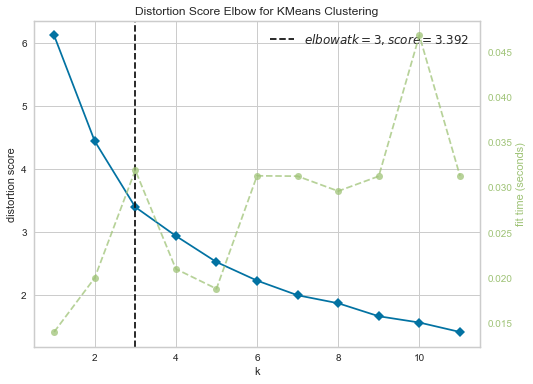

In [87]:
#The elbow method
BLR_grouped_clustering = BLR_grouped.drop('Neighborhood', 1)
BLR_model = KMeans(random_state=1)
plt.figure(figsize=(8,6))
visualizer = KElbowVisualizer(BLR_model, k=(1,12)).fit(BLR_grouped_clustering).show() # Fit the data to the visualizer


Optimum no. of clusters for bangalore is 3.

In [89]:
#Conduct the cluster analysis using the optimum number
kclusters = 3 # set number of clusters
BLR_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(BLR_grouped_clustering) # run k-means clustering
BLR_kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [93]:
#BLR_sorted.insert(0, 'Cluster Labels', BLR_kmeans.labels_) # add clustering labels
BLR_merged = BLR_neig
# merge to add latitude/longitude for each neighborhood
BLR_merged = BLR_merged.join(BLR_sorted.set_index('Neighborhood'), on='Neighborhood')
BLR_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,12.8872,77.596,1.0,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Chinese Restaurant,Bakery,Mughlai Restaurant,Breakfast Spot,Diner,Sandwich Place
1,Banashankari,12.9152,77.5736,1.0,Indian Restaurant,Fast Food Restaurant,Bakery,Café,Seafood Restaurant,South Indian Restaurant,Restaurant,Sandwich Place,Breakfast Spot,Diner
2,Banaswadi,13.0142,77.6519,0.0,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Kerala Restaurant,Andhra Restaurant,BBQ Joint,Bakery,South Indian Restaurant,Pizza Place,Vietnamese Restaurant
3,Basavanagudi,12.9417,77.5755,1.0,Indian Restaurant,Fast Food Restaurant,Café,Sandwich Place,Restaurant,Asian Restaurant,Bakery,Pizza Place,Snack Place,Mediterranean Restaurant
4,"Begur, Bangalore",12.8634,77.613,1.0,Fast Food Restaurant,Pizza Place,Vietnamese Restaurant,Food Court,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Food,Food Stand


In [94]:
BLR_merged=BLR_merged.dropna()

In [97]:
# create map
BLR_clusters = folium.Map(location=[BLR_latitude, BLR_longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BLR_merged['Latitude'], BLR_merged['Longitude'], BLR_merged['Neighborhood'], BLR_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(BLR_clusters)
       
BLR_clusters

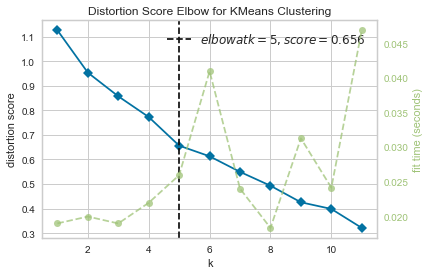

In [98]:
#The elbow method
MUM_grouped_clustering = MUM_grouped.drop('Neighborhood', 1)
MUM_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(MUM_model, k=(1,12)).fit(MUM_grouped_clustering).show() # Fit the data to the visualizer

Optimum no.of clusters for mumbai is 5.

In [99]:
kclusters = 5 # set number of clusters
MUM_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(MUM_grouped_clustering) # run k-means clustering
MUM_kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([2, 2, 4, 1, 1, 2, 1, 0, 2, 3])

In [102]:
#MUM_sorted.insert(0, 'Cluster Labels', MUM_kmeans.labels_) # add clustering labels
MUM_merged = MUM_neig
# merge to add latitude/longitude for each neighborhood
MUM_merged = MUM_merged.join(MUM_sorted.set_index('Neighborhood'), on='Neighborhood')
MUM_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,19.1561,72.8707,2,Indian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Snack Place,Sandwich Place,Dumpling Restaurant,Dim Sum Restaurant,Diner,Donut Shop
1,Andheri,19.1197,72.8464,2,Indian Restaurant,Fast Food Restaurant,Café,Bakery,Sandwich Place,Chinese Restaurant,Vegetarian / Vegan Restaurant,Snack Place,Breakfast Spot,Restaurant
2,Anushakti Nagar,19.0396,72.9222,4,Indian Restaurant,Food,Fast Food Restaurant,Café,Vietnamese Restaurant,Deli / Bodega,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
3,Bandra,19.055,72.8402,1,Indian Restaurant,Café,Chinese Restaurant,Restaurant,Seafood Restaurant,Fried Chicken Joint,Snack Place,Diner,Italian Restaurant,Food Truck
4,Borivali,19.2291,72.8574,1,Indian Restaurant,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Snack Place,Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Café,Burger Joint


In [103]:
MUM_merged=MUM_merged.dropna()

In [104]:
#create map
MUM_clusters = folium.Map(location=[MUM_latitude, MUM_longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MUM_merged['Latitude'], MUM_merged['Longitude'], MUM_merged['Neighborhood'], MUM_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(MUM_clusters)
       
MUM_clusters

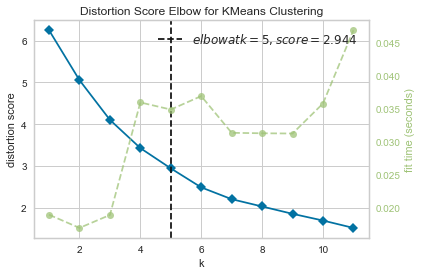

In [105]:
#The elbow method
HYD_grouped_clustering = HYD_grouped.drop('Neighborhood', 1)
HYD_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(HYD_model, k=(1,12)).fit(HYD_grouped_clustering).show() # Fit the data to the visualizer

Optimum no. of cluster for hyderabad is 5.


In [106]:

kclusters = 5 # set number of clusters
HYD_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(HYD_grouped_clustering) # run k-means clustering
HYD_kmeans.labels_[0:10] 

array([0, 0, 0, 2, 4, 4, 0, 1, 0, 0])

In [110]:
HYD_sorted.insert(0, 'Cluster Labels', HYD_kmeans.labels_) # add clustering labels
HYD_merged = HYD_neig
# merge to add latitude/longitude for each neighborhood
HYD_merged = HYD_merged.join(HYD_sorted.set_index('Neighborhood'), on='Neighborhood')
HYD_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abids,17.3895,78.4772,0.0,Indian Restaurant,Bakery,Fast Food Restaurant,Breakfast Spot,Snack Place,Food Truck,Middle Eastern Restaurant,Diner,Chaat Place,South Indian Restaurant
1,Alwal,17.5022,78.5089,0.0,Indian Restaurant,Bakery,Chinese Restaurant,Breakfast Spot,Wings Joint,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant
2,"Ameerpet, Hyderabad",17.4375,78.4483,0.0,Indian Restaurant,Café,Bakery,Pizza Place,Fast Food Restaurant,Deli / Bodega,Chinese Restaurant,Sandwich Place,Breakfast Spot,Food Court
3,"Bandlaguda, Rangareddy",17.3645,78.5896,2.0,Breakfast Spot,Chinese Restaurant,Wings Joint,Chaat Place,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant
4,Banjara Hills,17.4177,78.4399,4.0,Café,Indian Restaurant,Bakery,Restaurant,Food Court,Fast Food Restaurant,Sandwich Place,Italian Restaurant,Pizza Place,Rajasthani Restaurant


In [111]:
HYD_merged=HYD_merged.dropna()

In [112]:
HYD_clusters = folium.Map(location=[HYD_latitude, HYD_longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HYD_merged['Latitude'], HYD_merged['Longitude'], HYD_merged['Neighborhood'], HYD_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(HYD_clusters)
       
HYD_clusters

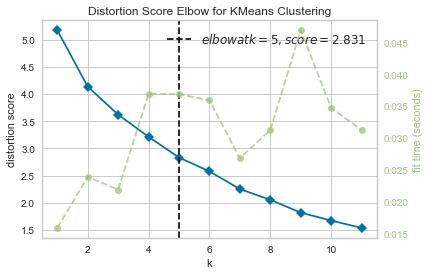

In [113]:
#The elbow method
CHE_grouped_clustering = CHE_grouped.drop('Neighborhood', 1)
CHE_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(CHE_model, k=(1,12)).fit(CHE_grouped_clustering).show() # Fit the data to the visualizer


In [114]:
kclusters = 5 # set number of clusters
CHE_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(CHE_grouped_clustering) # run k-means clustering
CHE_kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [116]:
CHE_sorted.insert(0, 'Cluster Labels', CHE_kmeans.labels_) # add clustering labels
CHE_merged = CHE_neig
# merge to add latitude/longitude for each neighborhood
CHE_merged = CHE_merged.join(CHE_sorted.set_index('Neighborhood'), on='Neighborhood')
CHE_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,12.9822,80.2091,0.0,Indian Restaurant,Pizza Place,Chettinad Restaurant,Hot Dog Joint,Halal Restaurant,Gastropub,Fried Chicken Joint,Food Truck,Food Court,Fast Food Restaurant
1,Adyar,13.0064,80.2578,1.0,Indian Restaurant,Pizza Place,Bakery,Café,Fast Food Restaurant,North Indian Restaurant,Vegetarian / Vegan Restaurant,Sandwich Place,Restaurant,Food Court
2,Alwarthirunagar,13.0475,80.1837,1.0,Indian Restaurant,Pizza Place,Fast Food Restaurant,Burger Joint,Café,Chettinad Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Gastropub
3,Anna Nagar,13.0872,80.2164,1.0,Indian Restaurant,Fast Food Restaurant,Bakery,Chinese Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Café,Snack Place,Burger Joint,BBQ Joint
4,Anna Salai,13.0761,80.2791,1.0,Indian Restaurant,Sandwich Place,Café,Fast Food Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant,Chaat Place,South Indian Restaurant,Food Truck


In [117]:
CHE_merged=CHE_merged.dropna()

In [119]:
#create map
CHE_clusters = folium.Map(location=[CHE_latitude, CHE_longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CHE_merged['Latitude'], CHE_merged['Longitude'], CHE_merged['Neighborhood'], CHE_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(CHE_clusters)
       
CHE_clusters

Now examining the content of clusters for each city by looking at the frequency of each venue category per cluster. To do this, I have created a dataset that has frequencies of each venue type.

BANGALORE

In [128]:
BLR_df_cluster = pd.merge(BLR_grouped,BLR_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
BLR_df_cluster = BLR_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
BLR_df_cluster.head()

Cluster Labels,0.0,1.0,2.0
Afghan Restaurant,0.003135,0.000270,0.0
American Restaurant,0.003135,0.009011,0.0
Andhra Restaurant,0.026364,0.006644,0.0
Asian Restaurant,0.005809,0.025401,0.0
BBQ Joint,0.003636,0.010298,0.0


In [129]:
def plot_bar(clusterdata,clusternumber):
    sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    df = df.sort_values(clusternumber, ascending = False).iloc[0:15]
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Cluster 0
There are 11 neighborhoods in this cluster


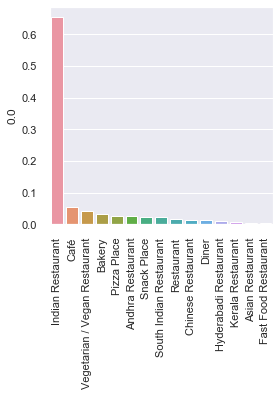

Cluster 1
There are 37 neighborhoods in this cluster


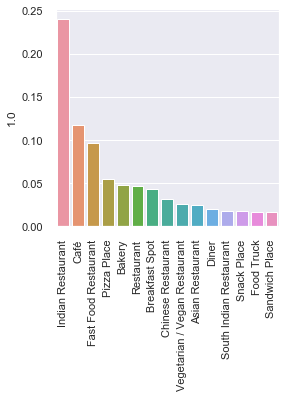

Cluster 2
There are 1 neighborhoods in this cluster


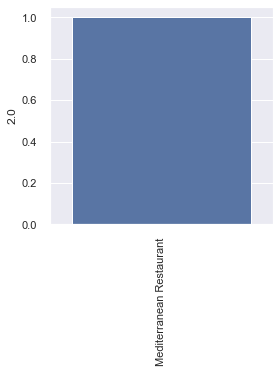

In [130]:
for i in range(3):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(BLR_merged[BLR_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(BLR_df_cluster,i)
    plt.show()

MUMBAI

In [131]:
MUM_df_cluster = pd.merge(MUM_grouped,MUM_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
MUM_df_cluster = MUM_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
MUM_df_cluster.head()

Cluster Labels,0,1,2,3,4
American Restaurant,0.000000,0.002978,0.000000,0.0,0.0
Asian Restaurant,0.051282,0.055413,0.022797,0.0,0.0
BBQ Joint,0.000000,0.005924,0.007166,0.0,0.0
Bakery,0.074566,0.056242,0.032248,0.0,0.0
Bistro,0.000000,0.001684,0.002020,0.0,0.0


In [132]:
def plot_bar(clusterdata,clusternumber):
    sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    df = df.sort_values(clusternumber, ascending = False).iloc[0:15]
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Cluster 0
There are 3 neighborhoods in this cluster


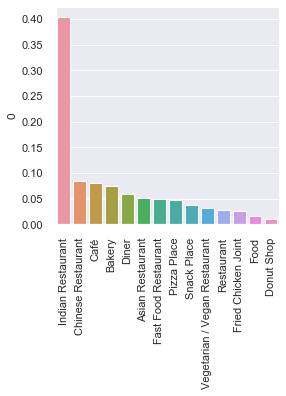

Cluster 1
There are 11 neighborhoods in this cluster


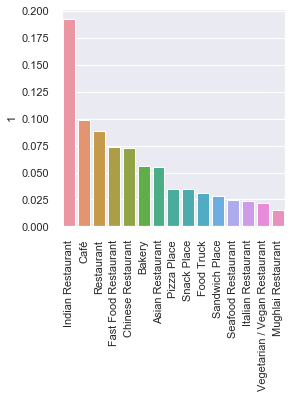

Cluster 2
There are 11 neighborhoods in this cluster


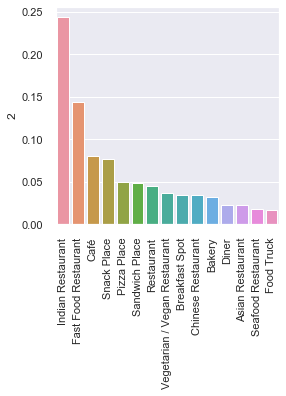

Cluster 3
There are 1 neighborhoods in this cluster


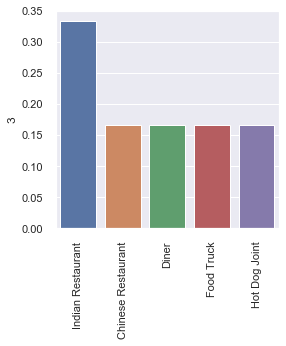

Cluster 4
There are 1 neighborhoods in this cluster


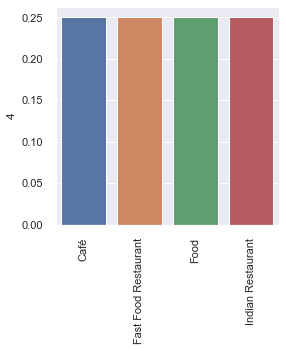

In [133]:
for i in range(5):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(MUM_merged[MUM_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(MUM_df_cluster,i)
    plt.show()

HYDERABAD

In [134]:
HYD_df_cluster = pd.merge(HYD_grouped,HYD_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
HYD_df_cluster = HYD_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
HYD_df_cluster.head()

Cluster Labels,0.0,1.0,2.0,3.0,4.0
Afghan Restaurant,0.000000,0.000,0.0,0.0,0.001606
American Restaurant,0.000000,0.000,0.0,0.0,0.001250
Andhra Restaurant,0.000000,0.125,0.0,0.0,0.002373
Asian Restaurant,0.023545,0.000,0.0,0.0,0.009802
Australian Restaurant,0.000000,0.000,0.0,0.0,0.000687


In [135]:
def plot_bar(clusterdata,clusternumber):
    sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    df = df.sort_values(clusternumber, ascending = False).iloc[0:15]
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Cluster 0
There are 13 neighborhoods in this cluster


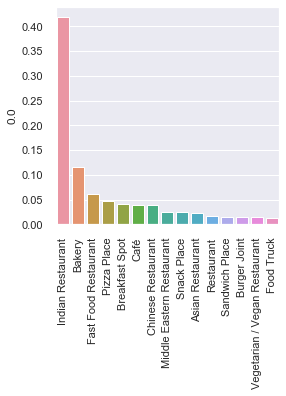

Cluster 1
There are 2 neighborhoods in this cluster


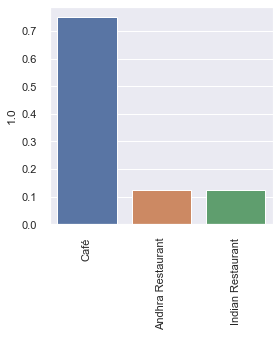

Cluster 2
There are 9 neighborhoods in this cluster


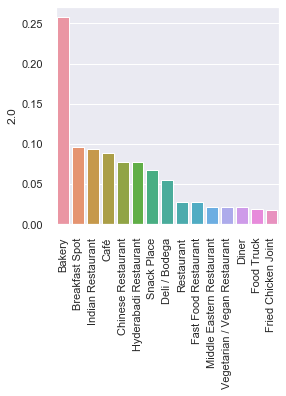

Cluster 3
There are 2 neighborhoods in this cluster


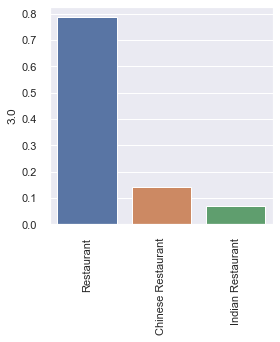

Cluster 4
There are 16 neighborhoods in this cluster


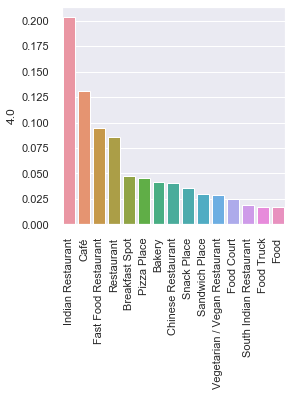

In [136]:
for i in range(5):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(HYD_merged[HYD_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(HYD_df_cluster,i)
    plt.show()

CHENNAI

In [137]:
CHE_df_cluster = pd.merge(CHE_grouped,CHE_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
CHE_df_cluster = CHE_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
CHE_df_cluster.head()

Cluster Labels,0.0,1.0,2.0,3.0,4.0
Afghan Restaurant,0.0,0.000635,0.0,0.0,0.0
American Restaurant,0.0,0.011965,0.0,0.0,0.0
Andhra Restaurant,0.0,0.002474,0.0,0.0,0.0
Asian Restaurant,0.0,0.031460,0.0,0.0,0.0
BBQ Joint,0.0,0.005132,0.0,0.0,0.0


In [138]:
def plot_bar(clusterdata,clusternumber):
    sns.set(style="darkgrid",rc={'figure.figsize':(25,15)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    df = df.sort_values(clusternumber, ascending = False).iloc[0:15]
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Cluster 0
There are 6 neighborhoods in this cluster


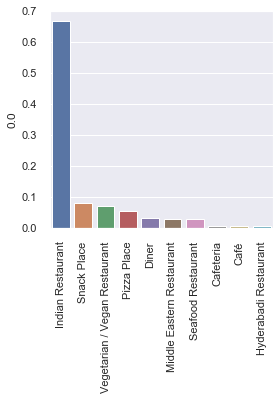

Cluster 1
There are 35 neighborhoods in this cluster


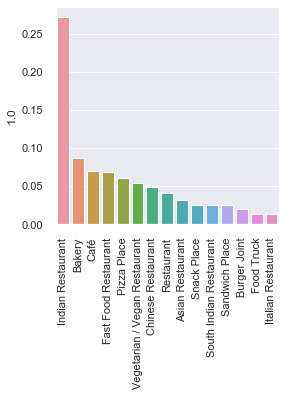

Cluster 2
There are 1 neighborhoods in this cluster


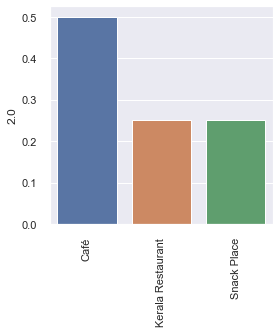

Cluster 3
There are 1 neighborhoods in this cluster


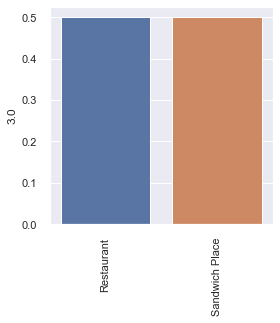

Cluster 4
There are 1 neighborhoods in this cluster


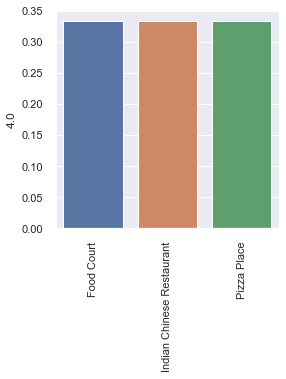

In [139]:
for i in range(5):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(CHE_merged[CHE_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(CHE_df_cluster,i)
    plt.show()

CONCLUSION


Based on the number of clusters we can see that bangalore has the least number of clusters but the no. of clusters 
is not the only good indicator of diversity in cuisine because a single cluster of bangalore has 75 categories of cuisine for that we have to examine the data of each cluster and what they offer to customers.After my examination of cluster analysis I have come to a conclusion that Hyderabad is the most optimal location for starting food delivery service as it contains three big unique clusters and comparable neighbours to chennai, and mumbai.
